In [1]:
import os
import time

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from copo import pretty_print

%matplotlib inline

In [2]:
eval_df = []
# for algo in ["ccppo", "cl", "ippo", "copo"]:
#     for env in ["round", "inter", "parking", "tollgate", "bottle"]:
for algo in ["ippo", "copo"]:
    for env in ["inter"]:
        for i in range(5):
            p = os.path.abspath("demo_results/evaluate_results/{}_{}_{}.csv".format(algo, env, i))
            if os.path.exists(p):
                tmp = pd.read_csv(p)
                tmp["env"] = env
                tmp["algo"] = algo
                tmp["model_index"] = i
                eval_df.append(tmp)
                print("Saved ", algo, env, i)
            else:
                print(p, " not exists!")
                
eval_df = pd.concat(eval_df)

Saved  ippo inter 0
Saved  ippo inter 1
Saved  ippo inter 2
Saved  ippo inter 3
Saved  ippo inter 4
Saved  copo inter 0
Saved  copo inter 1
Saved  copo inter 2
Saved  copo inter 3
Saved  copo inter 4


In [3]:
eval_df.keys()

Index(['Unnamed: 0', 'velocity_step_mean_episode_min',
       'velocity_step_mean_episode_mean', 'velocity_step_mean_episode_max',
       'energy_step_mean_episode_min', 'energy_step_mean_episode_mean',
       'energy_step_mean_episode_max', 'coll_step_mean_episode_min',
       'coll_step_mean_episode_mean', 'coll_step_mean_episode_max',
       'num_neighbours_mean_episode_mean', 'num_neighbours_mean_episode_max',
       'num_agents_total', 'num_agents_total_per_300_steps', 'success_rate',
       'num_agents_success', 'num_agents_success_per_300_steps',
       'num_agents_failed_per_300_steps', 'episode_reward_mean',
       'episode_reward_min', 'episode_reward_max', 'episode_cost_mean',
       'episode_cost_min', 'episode_cost_max', 'episode_cost_sum',
       'crash_rate', 'num_agents_crash', 'out_rate', 'num_agents_out',
       'episode_length_mean', 'success_episode_length_mean',
       'svo_estimate_deg_mean', 'svo_estimate_deg_min', 'svo_estimate_deg_max',
       'svo_reward', 'ep

In [4]:
final_plot_data_from_eval_data = []


# === Success Rate: Number of successes / Number of spawn agents ===
# This value is recorded directly by evaluation script!
stat_key = "success_rate"
print_key = "Competence"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

# === Efficiency: The net successes in one episode ===
# Though we may have different episode length, we use 1000 steps as a general episode length.
# The "net successes" is the total number of successes minus total number of failures.
eval_df["fixed_efficiency"] = (
    eval_df["num_agents_success"] - eval_df["num_agents_crash"] - eval_df["num_agents_out"]
) / 1000
stat_key = "fixed_efficiency"
print_key = "Efficiency"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

# === Safety: How many failures happen in one episode. ===
# Failure means an agent terminates without reaching destination.
eval_df["num_failed"] = eval_df["num_agents_crash"] + eval_df["num_agents_out"]
stat_key = "num_failed"
print_key = "Safety"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            
            val = gbb[stat_key].mean()
            print("Env {}, Algo {}, Model {}, Val {:.3f} (Suc {:.3f}, "
                  "Eff {:.3f}, Div {:.3f}), num agent {:.3f}"
                  .format(
                env, algo, model_index, val, gbb.success_rate.mean(), 
                gbb["fixed_efficiency"].mean(),
                gbb["coll_step_mean_episode_mean"].mean(),
                gbb["num_agents_total"].mean(),
#                 len(gbb)
            ))

            val = -val
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

Env inter, Algo copo, Model 0, Val 25.100 (Suc 0.812, Eff 0.083, Div 0.129), num agent 133.200
Env inter, Algo copo, Model 1, Val 25.500 (Suc 0.784, Eff 0.067, Div 0.109), num agent 118.050
Env inter, Algo copo, Model 2, Val 25.400 (Suc 0.653, Eff 0.030, Div 0.228), num agent 85.400
Env inter, Algo copo, Model 3, Val 21.050 (Suc 0.847, Eff 0.099, Div 0.118), num agent 141.200
Env inter, Algo copo, Model 4, Val 22.750 (Suc 0.817, Eff 0.082, Div 0.097), num agent 127.250
Env inter, Algo ippo, Model 0, Val 90.700 (Suc 0.582, Eff 0.035, Div 0.109), num agent 216.400
Env inter, Algo ippo, Model 1, Val 133.250 (Suc 0.405, Eff -0.043, Div 0.168), num agent 223.650
Env inter, Algo ippo, Model 2, Val 94.950 (Suc 0.517, Eff 0.007, Div 0.178), num agent 196.600
Env inter, Algo ippo, Model 3, Val 137.650 (Suc 0.466, Eff -0.018, Div 0.117), num agent 257.700
Env inter, Algo ippo, Model 4, Val 193.500 (Suc 0.269, Eff -0.122, Div 0.182), num agent 265.500


In [5]:
final_plot_data_to_plot = pd.DataFrame(final_plot_data_from_eval_data)
final_plot_data_to_plot

,env,algo,model_index,stat_key,print_key,value
0,inter,copo,0,success_rate,Competence,0.812030
1,inter,copo,1,success_rate,Competence,0.784099
2,inter,copo,2,success_rate,Competence,0.652624
3,inter,copo,3,success_rate,Competence,0.846648
4,inter,copo,4,success_rate,Competence,0.817265
5,inter,ippo,0,success_rate,Competence,0.581573
6,inter,ippo,1,success_rate,Competence,0.404589
7,inter,ippo,2,success_rate,Competence,0.516798
8,inter,ippo,3,success_rate,Competence,0.466138
9,inter,ippo,4,success_rate,Competence,0.268833


Env inter, Algo ippo, Key Competence, val min 0.2688334314300088, val max 0.8466481346974545
Env inter, Algo ippo, Key Efficiency, val min -0.12215000000000002, val max 0.09875
Env inter, Algo ippo, Key Safety, val min -193.5, val max -21.05
Env inter, Algo ippo, [1.04719755 3.14159265 5.23598776 1.04719755], ['Success Rate', 'Efficiency', 'Safety']
Env inter, Algo copo, [1.04719755 3.14159265 5.23598776 1.04719755], ['Success Rate', 'Efficiency', 'Safety']


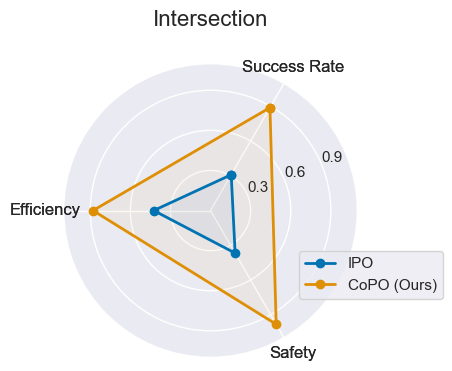

In [6]:
# Normalize each metric
new_df = []
for env, gb in final_plot_data_to_plot.groupby("env"):
    for k, gbb in gb.groupby("print_key"):
        val = gbb.value
        print(f"Env {env}, Algo {algo}, Key {k}, val min {val.min()}, val max {val.max()}")
        val = (val - val.min()) / (val.max() - val.min())
        gb.loc[gb.print_key == k, "value"] = val
    new_df.append(gb)
final_plot_data_to_plot = pd.concat(new_df)


sns.set("notebook", "darkgrid")
c = sns.color_palette("colorblind")


# Rename and reorder environments and algorithms
env_mapping = {
    "bottle": "Bottleneck",
    "tollgate": "Tollgate",
    "inter": "Intersection",
    "round": "Roundabout",
    "parking": "Parking Lot"
}

algo_mapping = {
    "ippo": "IPO",
#     "ccppo": "MFPO",
    "copo": "CoPO (Ours)",
#     "cl": "CL"
}

# algo_order = ["ippo", "ccppo", "cl", "copo"]
algo_order = ["ippo", "copo"]

# env_order = ["round", "inter", "tollgate", "bottle", "parking"]
env_order = ["inter"]

# matplotlib.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(dpi=100, figsize=(22, 6))  

for env_count, env in enumerate(env_order):
    env_plot_data = final_plot_data_to_plot[final_plot_data_to_plot.env == env] 

    ax = fig.add_subplot(1, 5, env_count + 1, polar=True)
    
    for algo_count, algo in enumerate(algo_order):
        algo_plot_data = env_plot_data[env_plot_data.algo == algo]
    
        labels = ["Competence", "Efficiency", "Safety"]
        plot_labels = ["Success Rate", "Efficiency", "Safety"]
        
        stats = [algo_plot_data[algo_plot_data.print_key == k].value.mean() for k in labels]
        
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)+ np.pi/2 - np.pi / 6
        stats = np.concatenate((stats, [stats[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax.plot(angles, stats, 'o-', linewidth=2, label=algo_mapping[algo], c=c[algo_count])
        ax.fill(angles, stats, alpha=0.05, c=c[algo_count])
        ax.set_ylim(0, 1.1)
        
        print("Env {}, Algo {}, {}, {}".format(env, algo, angles, plot_labels))
        ax.set_thetagrids(angles[:3] * 180/np.pi, plot_labels)
        
        ax.tick_params(pad=0)

        plt.gcf().canvas.draw()
        labels = []
        angles2 = [0, 0, 0]
        for label, angle in zip(ax.get_xticklabels(), angles2):
            x,y = label.get_position()
            lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                          ha=label.get_ha(), va=label.get_va(),
                          fontname=label.get_fontname(),
                          fontstyle="normal",
                          fontweight="light"
                         )
            lab.set_rotation(angle)
        ax.set_xticklabels([])
        ax.set_yticks([0.3, 0.6, 0.9])
        ax.set_title(env_mapping[env], size=16, y=1.1)
        
ax.legend(loc=(0.8, 0.2))
fig.savefig("demo_result.pdf".format(env), format='pdf', dpi=300, bbox_inches = "tight")



